ODR


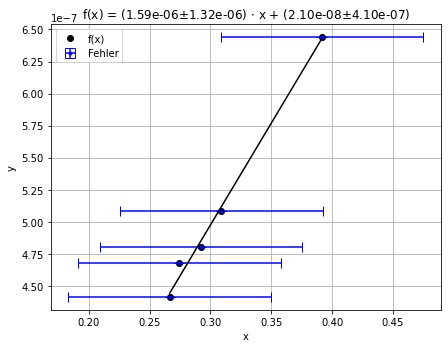

d_theo=1.6666666666666667e-06
d :1.5885264018729175e-06 +- 1.3225583327668525e-06


In [192]:
%run ../odr_v2.ipynb
%run ../arr2table_v3.2.ipynb
#Theo:
#Violett,Blau,Grün,Hellblau,Rot
cdt=np.array([441.463,467.8136,479.9914,508.5824,643.84696])*1e-9

#error für grad und min
cdg_err=0
cdm_err=5

#linke ordung
cdlg=np.array([25,26,26,27,32])
cdlm=np.array([0,0,3,3,10])
cdl=cdlg+cdlm/60

#rechte ordung
cdrg=np.array([354,354,352,351,346])
cdrm=np.array([5,8,4,3,3])
cdr=cdrg+cdrm/60
#Justage:
cdr=(360-cdr)

cdl_err=cdr_err=np.sqrt(cdg_err**2+(cdm_err/60)**2)
cd=(cdl+cdr)/2
cd_err=cdl_err
print("ODR")#
out=zeichnen(x=np.sin(np.deg2rad(cd)),y=cdt,scientific=[2,2],x_err=cd_err,y_err=1e-30,odr=True,beta0=[6e5,0])
d=out.beta[0]
d_err=out.sd_beta[0]
dt=1/600000
print("d_theo={}".format(dt))
print("d :{} +- {}".format(d,d_err))


[14.5        15.03333333 17.01666667 23.91666667]
berechnetes d
[397.73524702 412.03349387 464.88204529 644.00054174]
theoreitsches d
[417.30000676 432.30159023 487.74978354 675.67919222]
wikipedia lambda
[410.1735 434.045  486.132  656.278 ]
vakuum lambda (berechnetes d):
[397.85059024 412.15298358 465.01686108 644.1873019 ]
[0.22222222 0.21       0.1875     0.13888889]


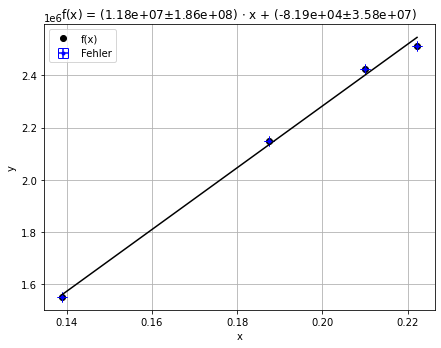

In [189]:
#Violett,Violett,Blau-Grün(Türkis),Rot
#Hδ,Hγ,Hβ,Hα
#6,5,4,3

#linke ordung
hlg=np.array([24,24,26,33])
hlm=np.array([0,5,10,0])
hl=hlg+hlm/60

#rechte ordung
hrg=np.array([355,354,352,345])
hrm=np.array([0,1,8,10])
hr=hrg+hrm/60
#Justage:
hr=(360-hr)

h=(hl+hr)/2
print(h)
#Wellenlängen:
#berechnet d:
print("berechnetes d")
hlam=d*np.sin(np.deg2rad(h))
print(hlam*1e9)
#theoretisches d
print("theoreitsches d")
hlamt=dt*np.sin(np.deg2rad(h))
print(hlamt*1e9)
#Wikipedia
print("wikipedia lambda")
hlam_wiki=np.array([410.1735,434.045,486.132,656.278])*1e-9
print(hlam_wiki*1e9)

print("vakuum lambda (berechnetes d):")
hlam_vac=hlam*(1+2.9e-4)
print(hlam_vac*1e9)

nm=np.array([1/2**2-1/(i)**2 for i in range(6,2,-1)])
#Häääääääääää warum flip 
#nm=np.flip(nm)
print(nm)
zeichnen(x=nm,y=1/hlam_vac,scientific=[2,2],beta0=[-1e7,2.5e6],odr=True)